# Classifier Overfitting (part 1)

**Aim:** Understand the notion of overfitting.

In this first part we are going to develop only the functions to manipulate the dataset.

In the subsequent part we are going to build the classifiers that operate over the datasets that we have generated here. 

Here we are building the functions needed to acquire the data and to add noise to make the task progressively  more difficult in a controlled way. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

## Question 1

a) Make a function `X,y = get_digits_data(digit_list=None)` that retreives the scikit [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). The function should return a data matrix `X` (with instances as rows) and a target vector `y`. The function should accept in input a list containing an arbitrary number of digits of interest: e.g. if one is interested in discriminating between the digits `7` and `9` then one should pass `digit_list=[7,9]`, if the digits of interest are `8,4,5,0` then `digit_list=[8,4,5,0]`, etc.

b) Make a function `plot_digit(x, shape=(8,8))` to represent a single instance vector `x` as a 2D array with shape `shape`. Use an inverted gray scale color map.

c) Make a function `plot_digits(X,y, shape=(8,8), n_images_per_row=5)` to arrange the 2D array representations of the instances in `X` in a grid with `n_images_per_row` columns. Each representation should have as a title the corresponding target.

In [15]:
from sklearn.datasets import load_digits
def get_digits_data(digit_list=None):
    # YOUR CODE HERE
    X,y = load_digits(return_X_y=True)
    if(digit_list is None):
        return X,y
    indexes = []
    Y = list(y)
    for i in digit_list:
        for j in range(len(Y)):
            if(Y[j]==i):
                indexes.append(j)
    X  = X[indexes]
    y = y[indexes]

    return X,y
    
def plot_digit(x, shape):
    # YOUR CODE HERE
    x = np.array(x)
    x  = x.reshape(shape[0],shape[1])
    plt.imshow(x,cmap='gray')
    
def plot_digits(X,y,shape, n_images_per_row=5):
    # YOUR CODE HERE
    try:
        shape = list(shape)
        n_rows = int(len(y)/n_images_per_row)
        fig,ax = plt.subplots(n_rows,n_images_per_row)
        count = 0
        for i in range(n_rows):
            for j in range(n_images_per_row):
                x  = np.array(X[count])
                x = X[count].reshape(shape[0],shape[1])
                ax[i,j].imshow(x,cmap='gray')
                count = count + 1
    except Exception as e:
        assert 'shape should be of same dimension'    
        

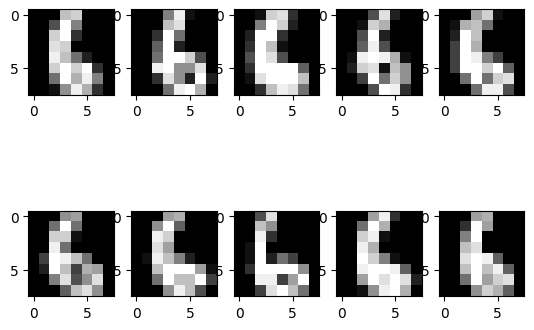

In [7]:
X,y = get_digits_data([6,7])
plot_digits(X[0:10],y[0:10],(8,8),5)

## Question 2

a) Make a function `X = add_input_noise(X, amount)` that returns a copy of the input data matrix `X` where a random real value in the interval `(-amount, amount)` has been added to each feature.

b) Make a function `y = add_target_noise(y, amount)` that returns a copy of the input target vector `y` where a fraction of `amount` elements have been swapped: amount=0.2 means 20% of the elements have been swapped. For example if `y = [0,1,2,3,4,5,6,7,8,9]` then `add_target_noise(y, amount=0.1)` could yield `[0,1,9,3,4,5,6,7,8,2]`, while `add_target_noise(y, amount=0.2)` could yield `[0,1,9,3,6,5,4,7,8,2]`.

c) Make a function `X,y = sample(X,y,n_samples)` that returns a random sample of `n_samples` instances in `X` and the corresponding `y`. The sample is obtained without replacement (i.e. an instance cannot be returned more than one time).  

In [8]:
def add_input_noise(X, amount=16):
    # YOUR CODE HERE
    shape = list(X.shape)
    lower_lim = -int(amount)
    upper_lim = int(amount)
    X_copy = []
    for i in X:
        random_noise = np.random.rand(1,shape[1])*(2*amount)-amount
        x = np.array(i)
        #x = x.reshape(shape[0],shape[1])
        z = np.add(x,random_noise)
        X_copy.append(z)
    X_copy = np.array(X_copy)
    #print(X_copy)
    return X_copy
    
def add_target_noise(y, amount):
    Y = y.copy()
    num_swaps = int(amount * (len(y)))
    for i in range(num_swaps):
        index_1  = np.random.randint(0,len(y))
        index_2  = np.random.randint(0,len(y))
        Y[index_2],Y[index_1] = Y[index_1],Y[index_2]
    return Y
    
def sample(X,y,n_samples):
    # YOUR CODE HERE
    sample_X = []
    sample_y = []
    indexes = []
    for i in range(n_samples):
        index = np.random.randint(0,len(y))
        if(index in indexes):
            while(index in indexes):
                index = np.random.randint(0,len(y))
        sample_X.append(X[index])
        sample_y.append(y[index])
        indexes.append(index)
    return np.array(sample_X),np.array(sample_y)
   

In [5]:
X,y = get_digits_data([6,7])
X,y = sample(X,y,10)

---

## Usage examples

The following cells show some examples of how you might use the requested functions. These examples are not available in the Assessment. In the Assessment you are to test your implementations on a **separate** notebook.

**Do not** add or remove cells in the Assessment notebook.

In the Assessment notebook you need to write **only** the function implementation, i.e. you need to replace 

```python
def function_name(input_var):
    # YOUR CODE HERE
    raise NotImplementedError() 
```

with

```python
def function_name(input_var):
    result = input_var * 2
    return result
```

**do not** write things like:

```python
def function_name(input_var):
    result = input_var * 2
    return result
    raise NotImplementedError() 
```
or
```python
def function_name(input_var):
    result = input_var * 2
    raise NotImplementedError() 
    return result
```

In [1004]:
X,y = get_digits_data(digit_list=[5,6,7,9])
print('#instances:%d #features:%d'%(X.shape[0], X.shape[1]))
print('#classes:%d'%(len(set(y))))

#instances:722 #features:64
#classes:4


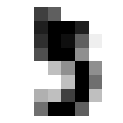

In [1005]:
#display one digit
plot_digit(X[0], shape=(8,8))

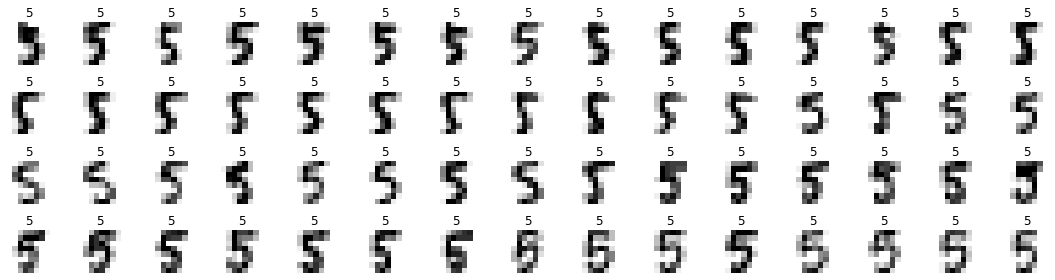

In [1006]:
#plot sample digits with associated targets
plot_digits(X[:60],y[:60], shape=(8,8), n_images_per_row=15)

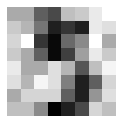

In [1007]:
#perturb input
X = add_input_noise(X, amount=10)
plot_digit(X[0], shape=(8,8))

In [1008]:
#perturb targets
print('Original targets')
print(y[:20])
y = add_target_noise(y, amount=.6)
print('Noisy targets')
print(y[:20])

Original targets
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Noisy targets
[7 5 5 6 9 5 5 5 6 6 5 5 5 9 5 9 5 9 6 9]


In [1009]:
print('Original #instances:%d'%(X.shape[0]))
X,y = sample(X,y,n_samples=500)
print('Sampled #instances:%d'%(X.shape[0]))

Original #instances:722
Sampled #instances:500


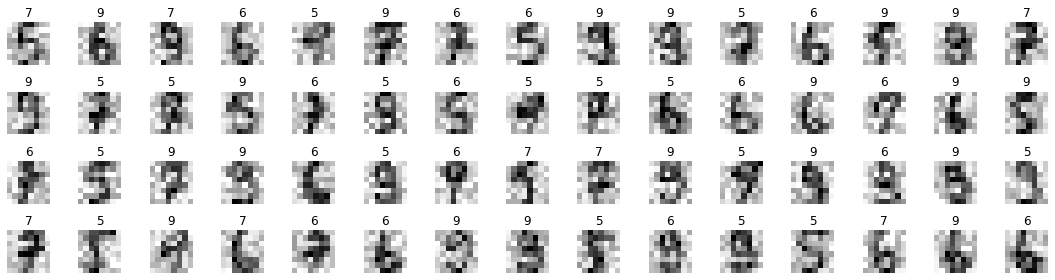

In [1010]:
#plot sample digits with associated targets
plot_digits(X[:60],y[:60], shape=(8,8), n_images_per_row=15)

## Unit Tests

In the following you can see examples of unit tests for the functions that you have been asked to make.

In the Assignment, each test is associated to a number of marks. Passing the test awards the marks. Not passing the test awards 0 marks. This mechanism is not implemented in the workshop notebooks.

In the Assignment the tests are not visible, instead you will see a cell that only contains the comment
```python
# This cell is reserved for the unit tests. Do not consider this cell. 
```

In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS 
X_test,y_test = get_digits_data(digit_list=[0,3])
assert X_test.shape[1] == 64, 'Expected instances with 64 features' 
assert len(set(y_test)) == 2, 'Expected 2 classes'
### END TESTS

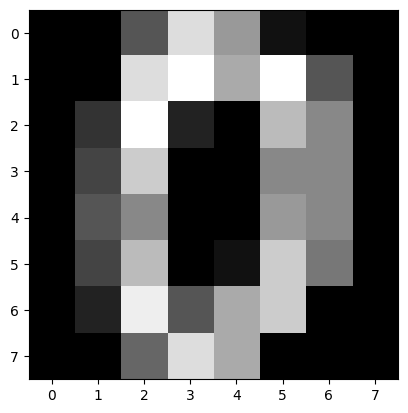

In [16]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS 
X_test,y_test = get_digits_data(digit_list=[0,3])
try:
    plot_digit(X_test[0], shape=(8,8))
except Exception:
    assert False, 'the function should not raise an exception when asked to plot a 8x8 image'
else:
    pass
try:
    plot_digit(X_test[0], shape=(8,9))
except Exception:
    pass
else:
    assert False, 'the function should raise an exception when asked to plot a 8x9 image'
### END TESTS

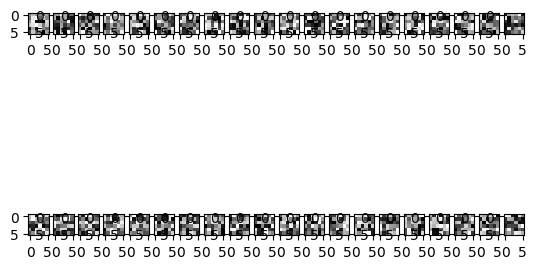

In [10]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS 
np.random.seed(0)
n=40
Xp = np.random.rand(n,36)
yp = np.random.randint(2, size=n)
try:
    plot_digits(Xp,yp, shape=(6,6), n_images_per_row=20)
except Exception:
    assert False, 'the function should not raise an exception when asked to plot a 6x6 image with n_images_per_row=20'
else:
    pass
### END TESTS

In [11]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS 
np.random.seed(0)
M = np.zeros((1000,10))
M = add_input_noise(M, amount=10)
print(np.fabs(np.mean(M)))
assert np.fabs(np.mean(M)) < 0.1, 'The mean of the addd noise is not < 0.1'
assert 4 < np.std(M) < 6, 'The std of the added noise is not in the interval [4,6]'
### END TESTS

0.07082216759821094


In [13]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS 
np.random.seed(0)
y_test = np.arange(10)
y_test = add_target_noise(y_test, amount=0)
assert np.all(y_test == np.arange(10)), 'Adding a 0 amount of noise should yield the input'
y_test = np.arange(100)
y_test_p = add_target_noise(y_test, amount=.1)
assert 80 <= np.sum(y_test_p == y_test) < 100, 'The number of elements that have not been altered should be in the interval [80,100]'
### END TESTS

In [14]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS 
np.random.seed(0)
Xp = np.random.rand(1000,10)
yp = np.random.randint(2, size=1000)
Xp,yp = sample(Xp,yp,n_samples=500)
assert Xp.shape == (500,10), 'Expected shape of (500,10)'
### END TESTS

---